In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import main_eval

In [4]:
import os, sys
import numpy as np
import pandas as pd

In [105]:
from tqdm import tqdm

In [13]:
fm_gts_dir = "data/gts/rq1/fashion_mnist"
fm_gts = {}
for i in range(30):
    df = pd.read_pickle("data/gts/rq1/fashion_mnist/rq1.seed{}.gts.pkl".format(i))
    gt_lst = []
    for l in df.keys():
        gt_lst.extend([(l,idx) for idx in df[l]])
    
    fm_gts[i] = gt_lst

In [17]:
fm_pair_dir = "results/rq1/all_layers/simple_fm/pairs"

In [55]:
def get_pairs(pair_dir, loc_which, num_iter):
    target_dir = os.path.join(pair_dir, loc_which)
    pairs = {}
    for i in range(num_iter):
        df = pd.read_csv(os.path.join(pair_dir,"{}/{}.pairs.csv".format(loc_which, i)), sep =";", header = None)
        pairs[i] = df
        pairs[i][0] = [eval(v) for v in pairs[i][0]]
        
    return pairs

In [124]:
def compute_roc_auc(loc_df, gts):
    from sklearn.metrics import auc

    recall_per_ranks = []
    num = len(loc_df)
    num_gts = len(gts)
    
    ranks_of_gts = loc_df.loc[loc_df[0].isin(gts)][1].values
    
    recall_per_ranks = []
    for i in range(num):
        cnt = np.sum(ranks_of_gts <= i+1)
        recall_per_ranks.append(cnt/num_gts)
        
    xs = np.arange(num)
    auc_score = auc(xs, recall_per_ranks)
    
    return auc_score, list(zip(xs, recall_per_ranks))

In [112]:
loc_pairs[0].loc[loc_pairs[0][0].isin(fm_gts[0])][1].values

array([    1,     4,    22, ..., 79194, 79296, 79329])

In [56]:
loc_pairs = get_pairs(fm_pair_dir, 'localiser', 30)

In [82]:
loc_pairs[0].loc[loc_pairs[0][0] == fm_gts[0][0]][1].values

array([78759])

In [125]:
outputs_loc = compute_roc_auc(loc_pairs[0], fm_gts[0])

In [126]:
outputs_loc[1]

[(0, 0.00025497195308516065),
 (1, 0.00025497195308516065),
 (2, 0.00025497195308516065),
 (3, 0.0005099439061703213),
 (4, 0.0005099439061703213),
 (5, 0.0005099439061703213),
 (6, 0.0005099439061703213),
 (7, 0.0005099439061703213),
 (8, 0.0005099439061703213),
 (9, 0.0005099439061703213),
 (10, 0.0005099439061703213),
 (11, 0.0005099439061703213),
 (12, 0.0005099439061703213),
 (13, 0.0005099439061703213),
 (14, 0.0005099439061703213),
 (15, 0.0005099439061703213),
 (16, 0.0005099439061703213),
 (17, 0.0005099439061703213),
 (18, 0.0005099439061703213),
 (19, 0.0005099439061703213),
 (20, 0.0005099439061703213),
 (21, 0.0007649158592554819),
 (22, 0.0007649158592554819),
 (23, 0.0007649158592554819),
 (24, 0.0007649158592554819),
 (25, 0.0007649158592554819),
 (26, 0.0007649158592554819),
 (27, 0.0007649158592554819),
 (28, 0.0007649158592554819),
 (29, 0.0007649158592554819),
 (30, 0.0007649158592554819),
 (31, 0.0007649158592554819),
 (32, 0.0007649158592554819),
 (33, 0.000764915

In [129]:
outputs_gl = compute_roc_auc(gl_pairs[0], fm_gts[0])

In [131]:
outputs_rd = compute_roc_auc(rd_pairs[0], fm_gts[0])

/home/jjsohn/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


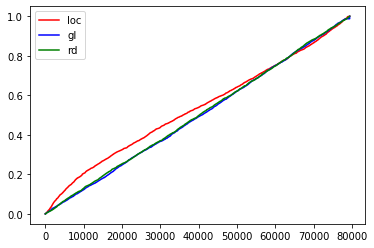

In [133]:
import matplotlib.pyplot as plt

plt.plot([v[0] for v in outputs_loc[1]], [v[1] for v in outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in outputs_gl[1]], [v[1] for v in outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in outputs_rd[1]], [v[1] for v in outputs_rd[1]], "g-", label='rd')

plt.legend()

In [67]:
(1,(0,8)) in fm_gts[0]

True

In [59]:
gl_pairs[0][0][0]

(3, (93, 6))

In [50]:
loc_pairs[0][0] = [eval(v) for v in loc_pairs[0][0]]

In [54]:
loc_pairs[0][0][0]

(3, (9, 8))

In [37]:
eval(loc_pairs[0][0].values[0])

(3, (9, 8))

In [40]:
fm_gts[0][0]

(1, (0, 8))

In [47]:
loc_pairs[0][0][0]

'(3, (9, 8))'

In [ ]:
lambda v,gt:eval(v) == gt 

In [45]:
loc_pairs[0].loc[loc_pairs[0][0] == fm_gts[0][0]]

TypeError: eval() arg 1 must be a string, bytes or code object

In [57]:
gl_pairs = get_pairs(fm_pair_dir, 'gradient_loss', 30)
rd_pairs = get_pairs(fm_pair_dir, 'random', 30)

In [ ]:
compute_roc_auc(ranks, gts)